<a href="https://colab.research.google.com/github/hemrajojha/CSC410/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Naive Bayes Classification
#https://heartbeat.fritz.ai/naive-bayes-classifier-in-python-using-scikit-learn-13c4deb83bcf
#https://www.edureka.co/blog/naive-bayes-tutorial/
#https://mashimo.wordpress.com/2019/07/13/classification-metrics-and-naive-bayes/
#To implement the naive Bayes classifier model, we’re going to use scikit-learn, and we’ll import our GaussianNB from sklearn.naive_bayes

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn import datasets  --use this for task
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
#setup google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
#https://github.com/dhirajk100/Naive-Bayes
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Naive-Bayes-Classification-Data.csv')
df



,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


In [ ]:
#Preprocessing
#we’ll create the x and y variables by taking them from the dataset and using the train_test_split function of scikit-learn to split the data into training and test sets
#Note that the test size of 0.25 indicates we’ve used 25% of the data for testing. 
#random_state ensures reproducibility
#For the output of train_test_split, we get x_train, x_test, y_train, and y_test values.

In [7]:
x=df.drop('diabetes',axis=1)
y=df['diabetes']

In [8]:
x

,glucose,bloodpressure
0,40,85
1,40,92
2,45,63
3,45,80
4,40,73
...,...,...
990,45,87
991,40,83
992,40,83
993,40,60


In [9]:
y

0      0
1      0
2      1
3      0
4      1
      ..
990    0
991    0
992    0
993    1
994    0
Name: diabetes, Length: 995, dtype: int64

In [11]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [32]:
y_test

920    1
525    1
567    1
657    0
633    0
      ..
490    1
707    0
894    0
208    0
277    0
Name: diabetes, Length: 249, dtype: int64

In [ ]:
#Train Model
#We’re going to use x_train and y_train, obtained above, to train our naive Bayes classifier model
#We’re using the fit method and passing the parameters

In [12]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Prediction
#Once the model is trained, it’s ready to make predictions. 
#We can use the predict method on the model and pass x_test as a parameter to get the output as y_pred

In [13]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0])

In [14]:
#Model Evaluation
#Finally, we need to check to see how well our model is performing on the test data
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

92.7710843373494

In [37]:
#accuracy confusion matrix
expected = y_test.to_numpy()
predicted = model.predict(x_test) #y_pred

In [34]:
expected

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0])

In [38]:
predicted

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0])

In [39]:
#classification report
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       114
           1       0.93      0.93      0.93       135

    accuracy                           0.93       249
   macro avg       0.93      0.93      0.93       249
weighted avg       0.93      0.93      0.93       249

[[105   9]
 [  9 126]]


In [53]:
x_labels = y_test.unique()
x_labels
y_labels = y_test.unique()
y_labels

array([1, 0])

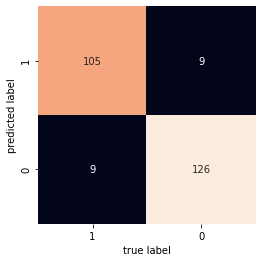

In [52]:
#plot confusion matrix
mat = confusion_matrix(expected, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [55]:
tn, fp, fn, tp = mat.ravel()
 
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  105
False Positives:  9
False Negatives:  9
True Positives:  126


In [56]:
Accuracy = (tn+tp)/(tp+tn+fp+fn)
print("Accuracy: {:.2f}".format(Accuracy))

Accuracy: 0.93


In [58]:
#task: calculate precision, recall, f1-score, sensitivity, specificity using tp, tn, fp, fn

In [59]:
#task: use dataset = datasets.load_iris() command to get sample dataset and perform Naive Bayes Classification

In [60]:
#resources
#https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
#https://pythonprogramminglanguage.com/naive-bayes-classifier/
#https://www.codespeedy.com/naive-bayes-algorithm-in-python/
#https://colab.research.google.com/github/csmastersUH/data_analysis_with_python_spring_2020/blob/master/bayes.ipynb
#https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html